# Clustering algorithms

In Machine Learning, the types of Learning can broadly be classified into three types:

1. Supervised Learning
2. Unsupervised Learning 
3. Semi-supervised Learning

Algorithms belonging to the family of Unsupervised Learning have no variable to predict tied to the data. Instead of having an output, the data only has an input which would be multiple variables that describe the data. This is where clustering comes in.

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

## K-Means

Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**.

In [1]:
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../datasets/mall-customers/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [8]:
df.rename(columns={
   "Annual Income (k$)": "Income",
    "Spending Score (1-100)": "Score"
}, inplace=True)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


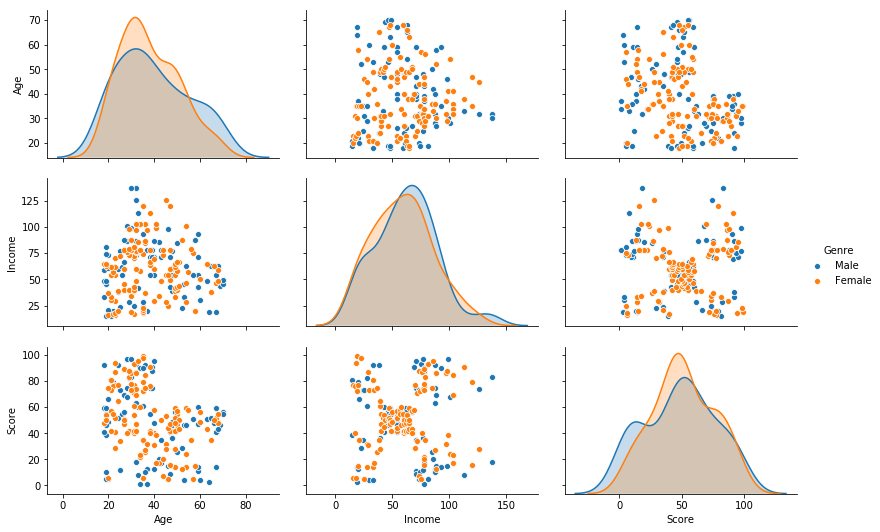

In [15]:
sns.pairplot(df.drop("CustomerID", axis=1), hue="Genre", aspect=1.5)

From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features which is why we will X parameter from now on.

In [16]:
from sklearn.cluster import KMeans

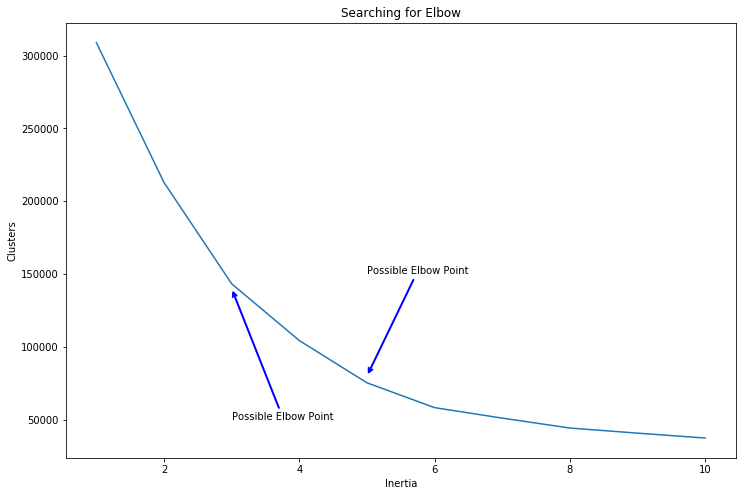

In [20]:
X = df.drop(["CustomerID","Genre"], axis=1)
clusters = []

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title("Searching for Elbow")
ax.set_ylabel("Clusters")
ax.set_xlabel("Inertia")

# Annotate arrow
ax.annotate("Possible Elbow Point",
            xy=(3,140000),
            xytext=(3,50000),
            xycoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3",
                            color="blue", lw=2))
ax.annotate("Possible Elbow Point", 
            xy=(5,80000),
            xytext=(5,150000),
            xycoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3",
                            color="blue", lw=2))
plt.show()

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

### Creating the Visual Plots

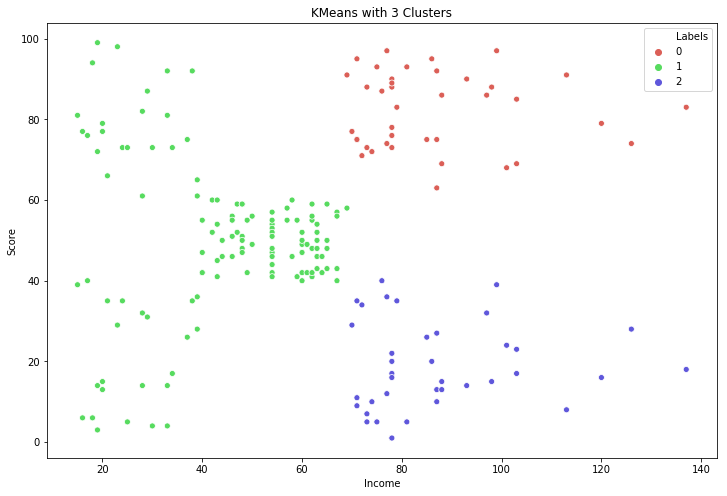

In [24]:
# 3 clusters

km3 = KMeans(n_clusters=3).fit(X)
X["Labels"] = km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X["Income"],
                X["Score"],
                hue=X["Labels"],
                palette=sns.color_palette("hls",3))
plt.title("KMeans with 3 Clusters")
plt.show()

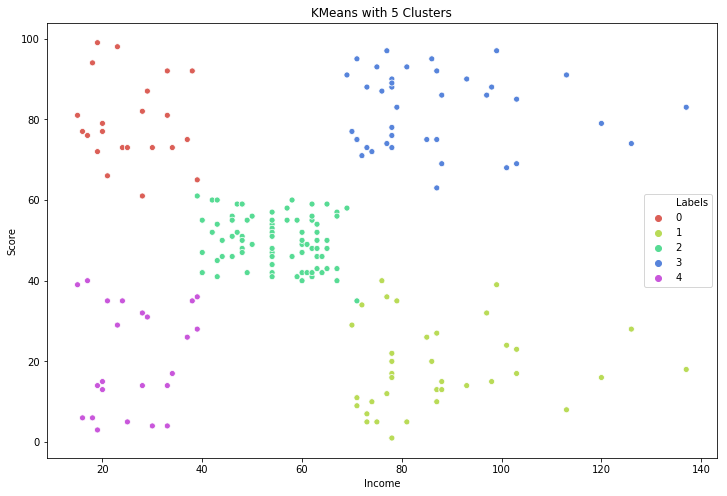

In [27]:
# 5 clusters

km5 = KMeans(n_clusters=5).fit(X)
X["Labels"] = km5.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X["Income"],
                X["Score"],
                hue=X["Labels"],
                palette=sns.color_palette("hls",5))
plt.title("KMeans with 5 Clusters")
plt.show()

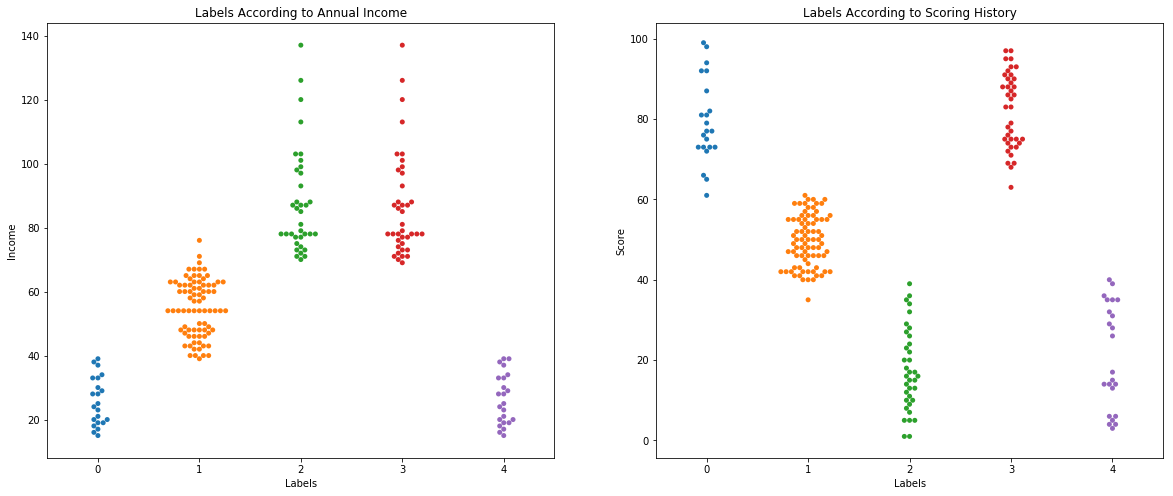

In [26]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x="Labels", y="Income", data=X, ax=ax)
ax.set_title("Labels According to Annual Income")

ax = fig.add_subplot(122)
sns.swarmplot(x="Labels", y="Score", data=X, ax=ax)
ax.set_title("Labels According to Scoring History")

plt.show()

## Hierachical Clustering

### Agglomerative Hierachical Clustering

The Agglomerative Clustering class will require two inputs:

1. n_clusters: The number of clusters to form as well as the number of centroids to generate.
2. linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    * Value will be: 'complete'
    * Note: It is recommended that try everything with 'average' as well

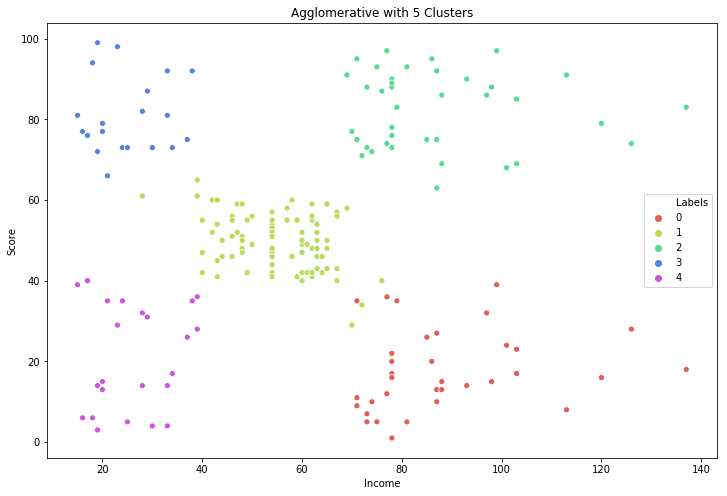

In [28]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage="average").fit(X)

X["Labels"] = agglom.labels_
plt.figure(figsize=(12,8))

sns.scatterplot(X["Income"], X["Score"], hue=X["Labels"], palette=sns.color_palette("hls",5))
plt.title("Agglomerative with 5 Clusters")

plt.show()